<a href="https://colab.research.google.com/github/JG-dot/Exploratory-Data-Analysis/blob/main/EDA_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/diabetes.csv"
df = pd.read_csv(url)

print("Dataset Dimensions (rows, columns):", df.shape)

print("\nSummary Statistics:")
print(df.describe(include='all'))

print("\nMissing Values BEFORE Cleaning:")
print(df.isnull().sum())
print("\nNumber of '?' entries in each column:")
print((df == '?').sum())

df.replace('?', np.nan, inplace=True)

for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].median())

print("\nMissing Values AFTER Cleaning:")
print(df.isnull().sum())

print("\nFirst 5 rows after cleaning:")
print(df.head())

print("\nNumber of duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)

categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", list(categorical_cols))
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print("\nData types after encoding:")
print(df.dtypes)

print("\nBasic statistics after handling:")
print(df.describe())

numeric_cols = df.select_dtypes(include=[np.number]).columns
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("\nFirst 5 rows after normalization:")
print(df.head())


Dataset Dimensions (rows, columns): (768, 9)

Summary Statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count    767.000000  768.000000     768.000000     768.000000  768.000000   
unique          NaN         NaN            NaN            NaN         NaN   
top             NaN         NaN            NaN            NaN         NaN   
freq            NaN         NaN            NaN            NaN         NaN   
mean       3.850065  120.894531      69.105469      20.536458   79.799479   
std        3.368910   31.972618      19.355807      15.952218  115.244002   
min        0.000000    0.000000       0.000000       0.000000    0.000000   
25%        1.000000   99.000000      62.000000       0.000000    0.000000   
50%        3.000000  117.000000      72.000000      23.000000   30.500000   
75%        6.000000  140.250000      80.000000      32.000000  127.250000   
max       17.000000  199.000000     122.000000      99.000000  846.000000   

         

Univariate Analysis (Central Tendency & Dispersion):

Pregnancies:
 Mean: 0.2264093137254902
 Median: 0.1764705882352941
 Mode: 0.058823529411764705
 Min: 0.0
 Max: 1.0
 Range: 1.0
 Variance: 0.039223863101494845
 Standard Deviation: 0.1980501529953836
 Interquartile Range (IQR): 0.2941176470588235
----------------------------------------


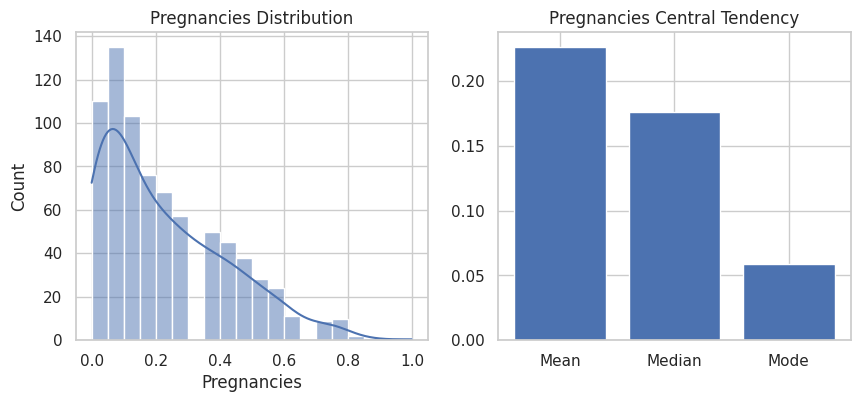

Glucose:
 Mean: 0.6075102072864321
 Median: 0.5879396984924623
 Mode: 0.49748743718592964
 Min: 0.0
 Max: 1.0
 Range: 1.0
 Variance: 0.025813699508900192
 Standard Deviation: 0.16066642309113685
 Interquartile Range (IQR): 0.20728643216080406
----------------------------------------


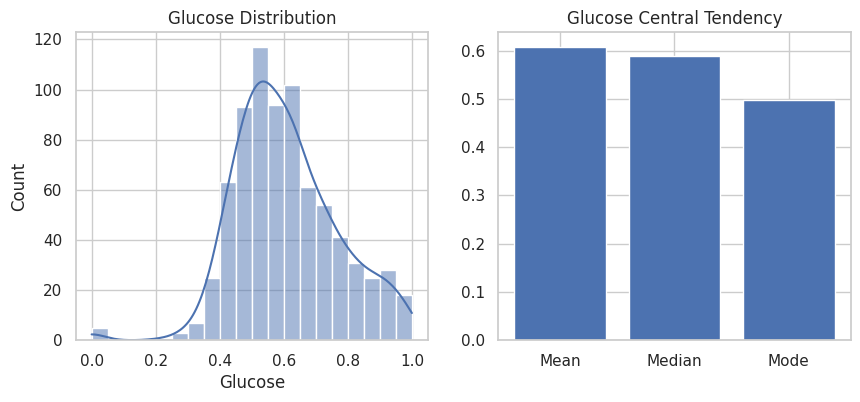

BloodPressure:
 Mean: 0.5664382684426229
 Median: 0.5901639344262295
 Mode: 0.5737704918032788
 Min: 0.0
 Max: 1.0
 Range: 1.0
 Variance: 0.02517114157667183
 Standard Deviation: 0.15865415713643255
 Interquartile Range (IQR): 0.14754098360655743
----------------------------------------


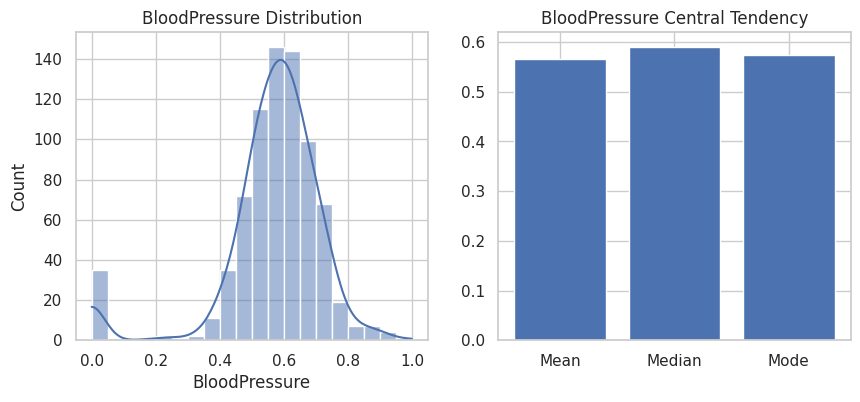

SkinThickness:
 Mean: 0.2074389730639731
 Median: 0.23232323232323235
 Mode: 0.0
 Min: 0.0
 Max: 1.0
 Range: 1.0
 Variance: 0.025964008297940717
 Standard Deviation: 0.16113351078512725
 Interquartile Range (IQR): 0.32323232323232326
----------------------------------------


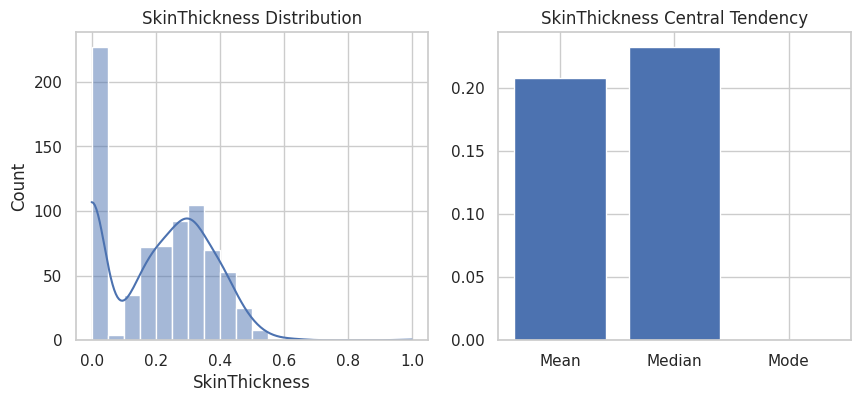

Insulin:
 Mean: 0.09432562549251378
 Median: 0.03605200945626477
 Mode: 0.0
 Min: 0.0
 Max: 1.0
 Range: 1.0
 Variance: 0.018556494584381588
 Standard Deviation: 0.13622222500158185
 Interquartile Range (IQR): 0.15041371158392436
----------------------------------------


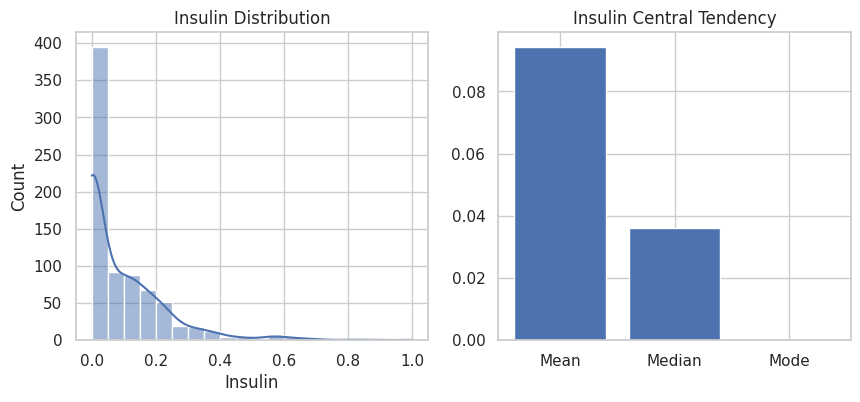

BMI:
 Mean: 0.4767895398658719
 Median: 0.4769001490312966
 Mode: 0.4769001490312966
 Min: 0.0
 Max: 1.0
 Range: 1.0
 Variance: 0.013805935922624269
 Standard Deviation: 0.11749866349292773
 Interquartile Range (IQR): 0.13859910581222057
----------------------------------------


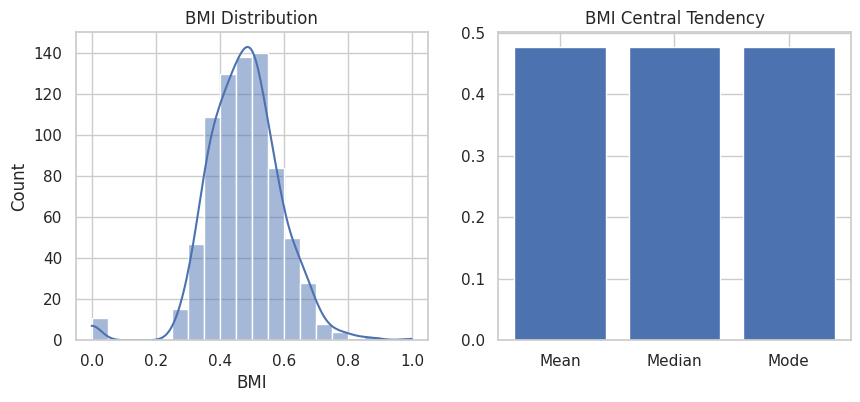

DiabetesPedigreeFunction:
 Mean: 0.16817390318104183
 Median: 0.1251067463706234
 Mode: 0.07514944491887275
 Min: 0.0
 Max: 0.9999999999999998
 Range: 0.9999999999999998
 Variance: 0.02001492402453851
 Standard Deviation: 0.14147411079253513
 Interquartile Range (IQR): 0.1633219470538002
----------------------------------------


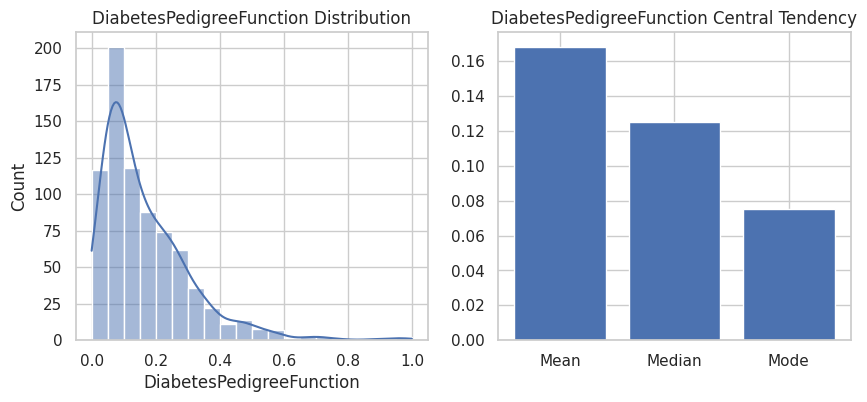

Age:
 Mean: 0.20401475694444446
 Median: 0.13333333333333336
 Mode: 0.016666666666666663
 Min: 0.0
 Max: 1.0
 Range: 1.0
 Variance: 0.038417512747325994
 Standard Deviation: 0.1960038590113113
 Interquartile Range (IQR): 0.2833333333333333
----------------------------------------


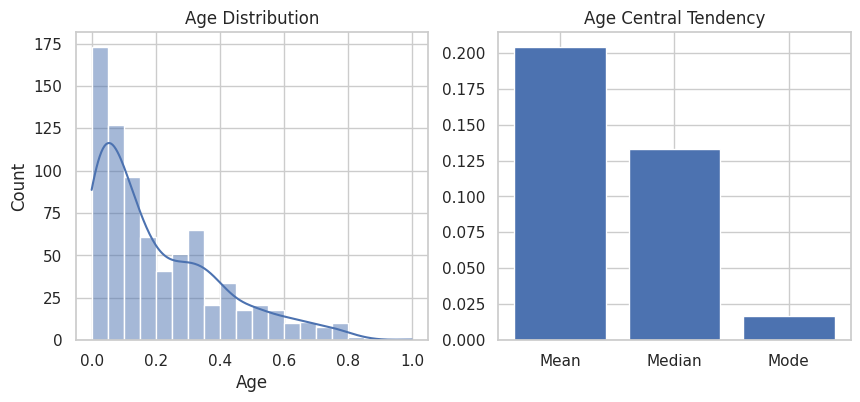

Outcome:
 Mean: 0.34765625
 Median: 0.0
 Mode: 0.0
 Min: 0.0
 Max: 1.0
 Range: 1.0
 Variance: 0.2270870681225554
 Standard Deviation: 0.47653653388020045
 Interquartile Range (IQR): 1.0
----------------------------------------


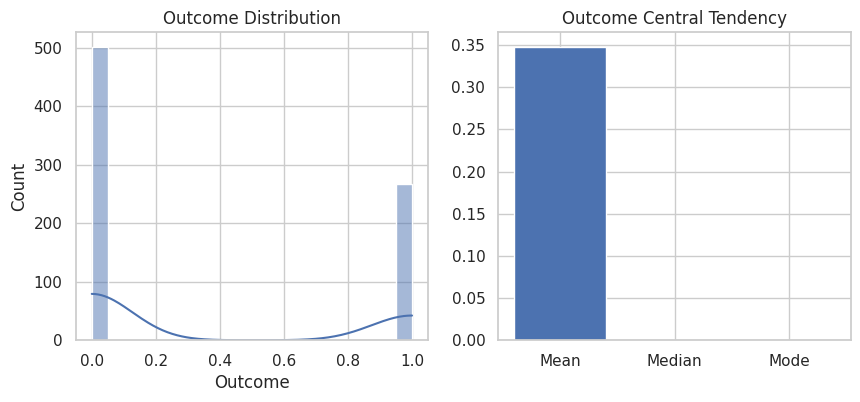

In [39]:

# Univariate Analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns

print("Univariate Analysis (Central Tendency & Dispersion):\n")
for col in numeric_cols:
    print(f"{col}:")
    print(" Mean:", df[col].mean())
    print(" Median:", df[col].median())
    print(" Mode:", df[col].mode()[0])
    print(" Min:", df[col].min())
    print(" Max:", df[col].max())
    print(" Range:", df[col].max() - df[col].min())
    print(" Variance:", df[col].var())
    print(" Standard Deviation:", df[col].std())
    print(" Interquartile Range (IQR):", df[col].quantile(0.75) - df[col].quantile(0.25))
    print("-"*40)

    # Distribution Plot
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'{col} Distribution')

    # Bar plot
    plt.subplot(1,2,2)
    plt.bar(['Mean', 'Median', 'Mode'], [df[col].mean(), df[col].median(), df[col].mode()[0]])
    plt.title(f'{col} Central Tendency')

    plt.show()

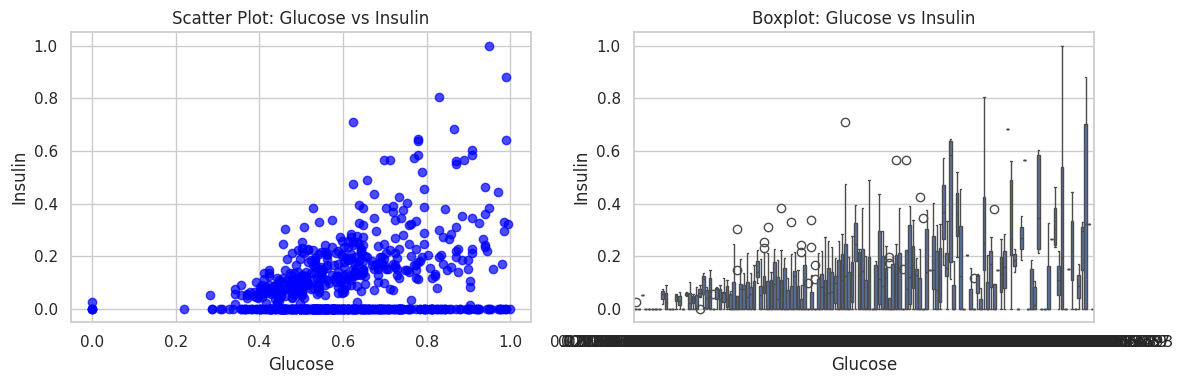

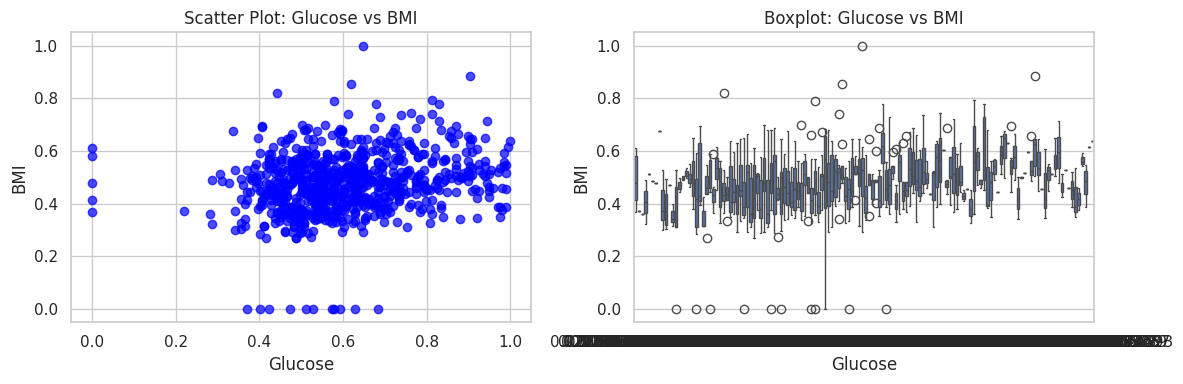

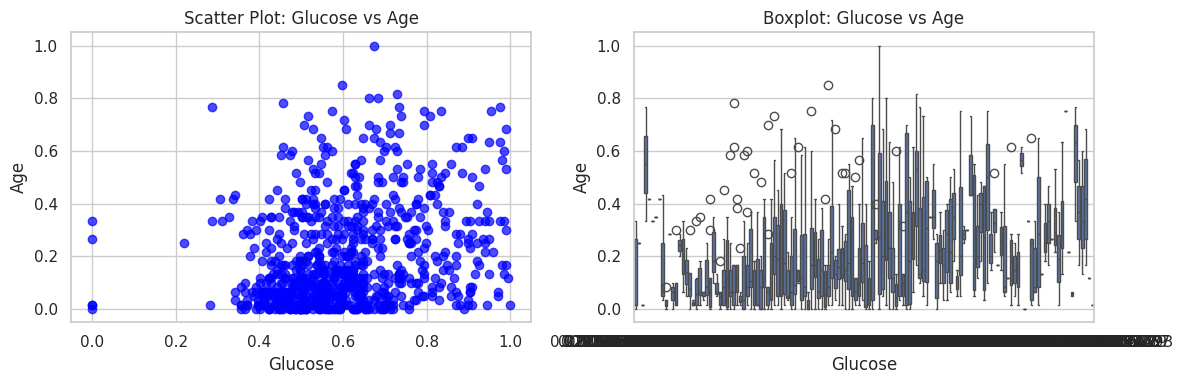

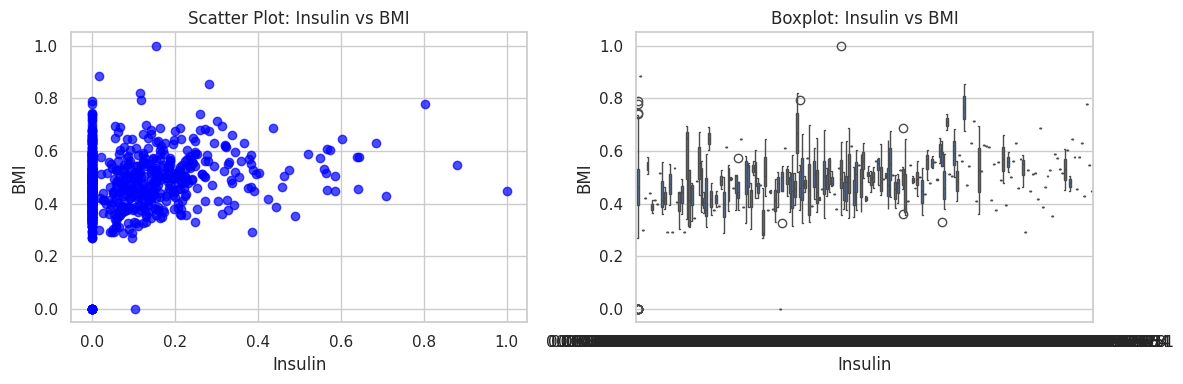

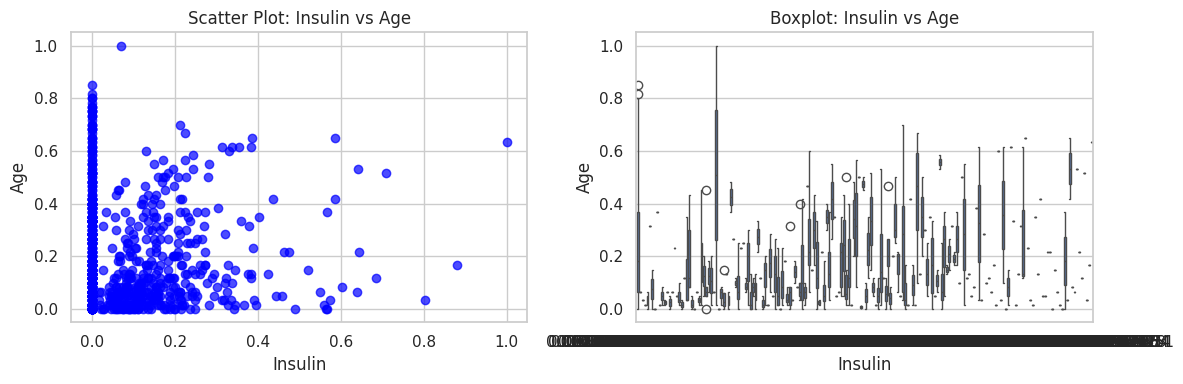

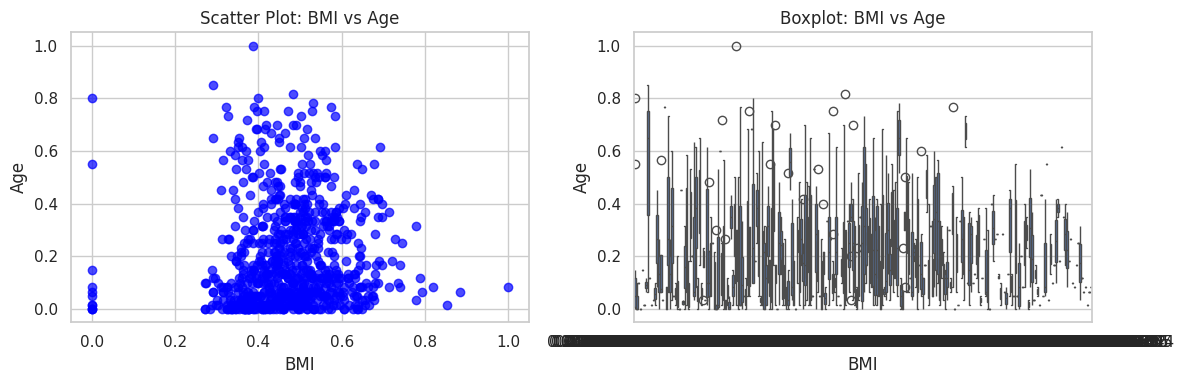

In [42]:
selected_features = ['Glucose', 'Insulin', 'BMI', 'Age']

for i in range(len(selected_features)):
    for j in range(i+1, len(selected_features)):
        feature_x = selected_features[i]
        feature_y = selected_features[j]

        plt.figure(figsize=(12,4))

        # 1. Scatter plot
        plt.subplot(1,2,1)
        plt.scatter(df[feature_x], df[feature_y], alpha=0.7, color='blue')
        plt.xlabel(feature_x)
        plt.ylabel(feature_y)
        plt.title(f'Scatter Plot: {feature_x} vs {feature_y}')

        # 2. Boxplot
        plt.subplot(1,2,2)
        sns.boxplot(x=df[feature_x], y=df[feature_y])
        plt.xlabel(feature_x)
        plt.ylabel(feature_y)
        plt.title(f'Boxplot: {feature_x} vs {feature_y}')

        plt.tight_layout()
        plt.show()

<Figure size 1200x1200 with 0 Axes>

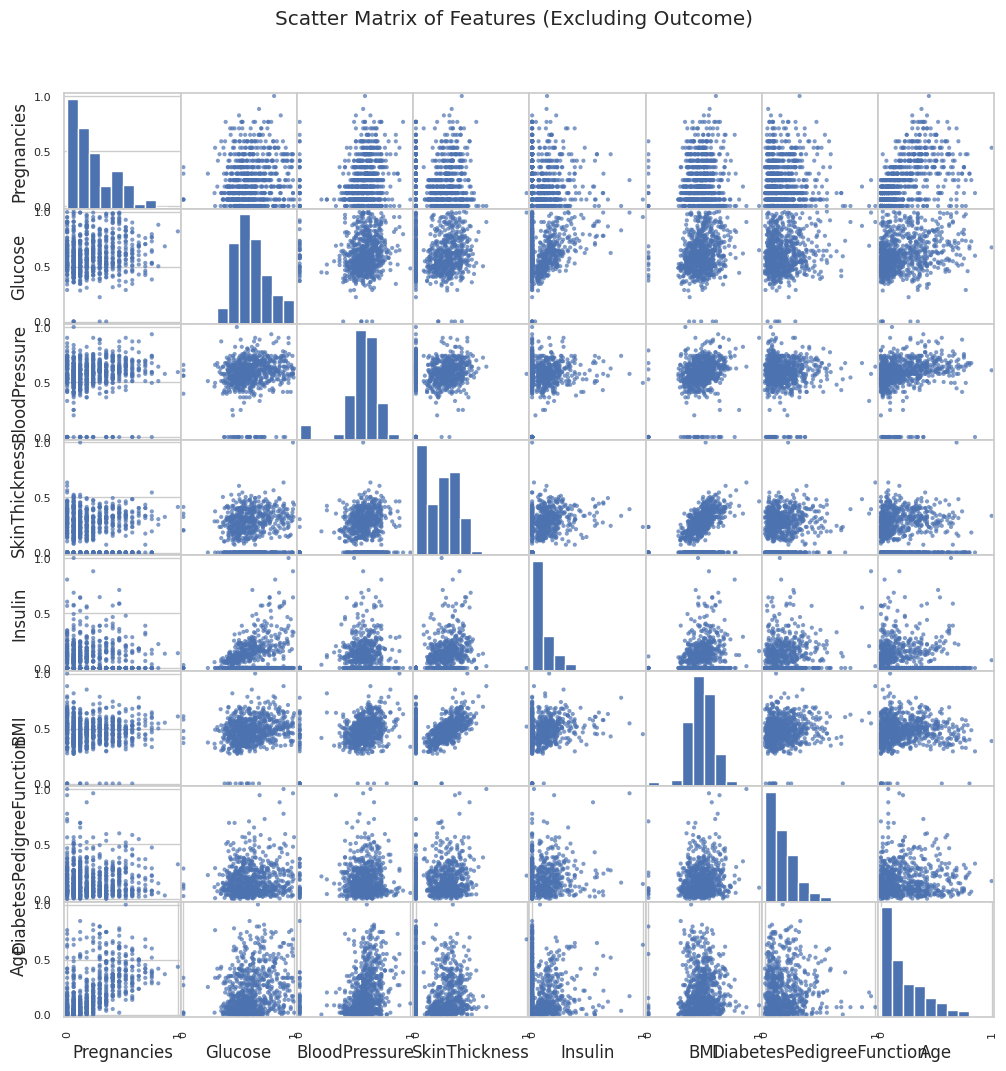

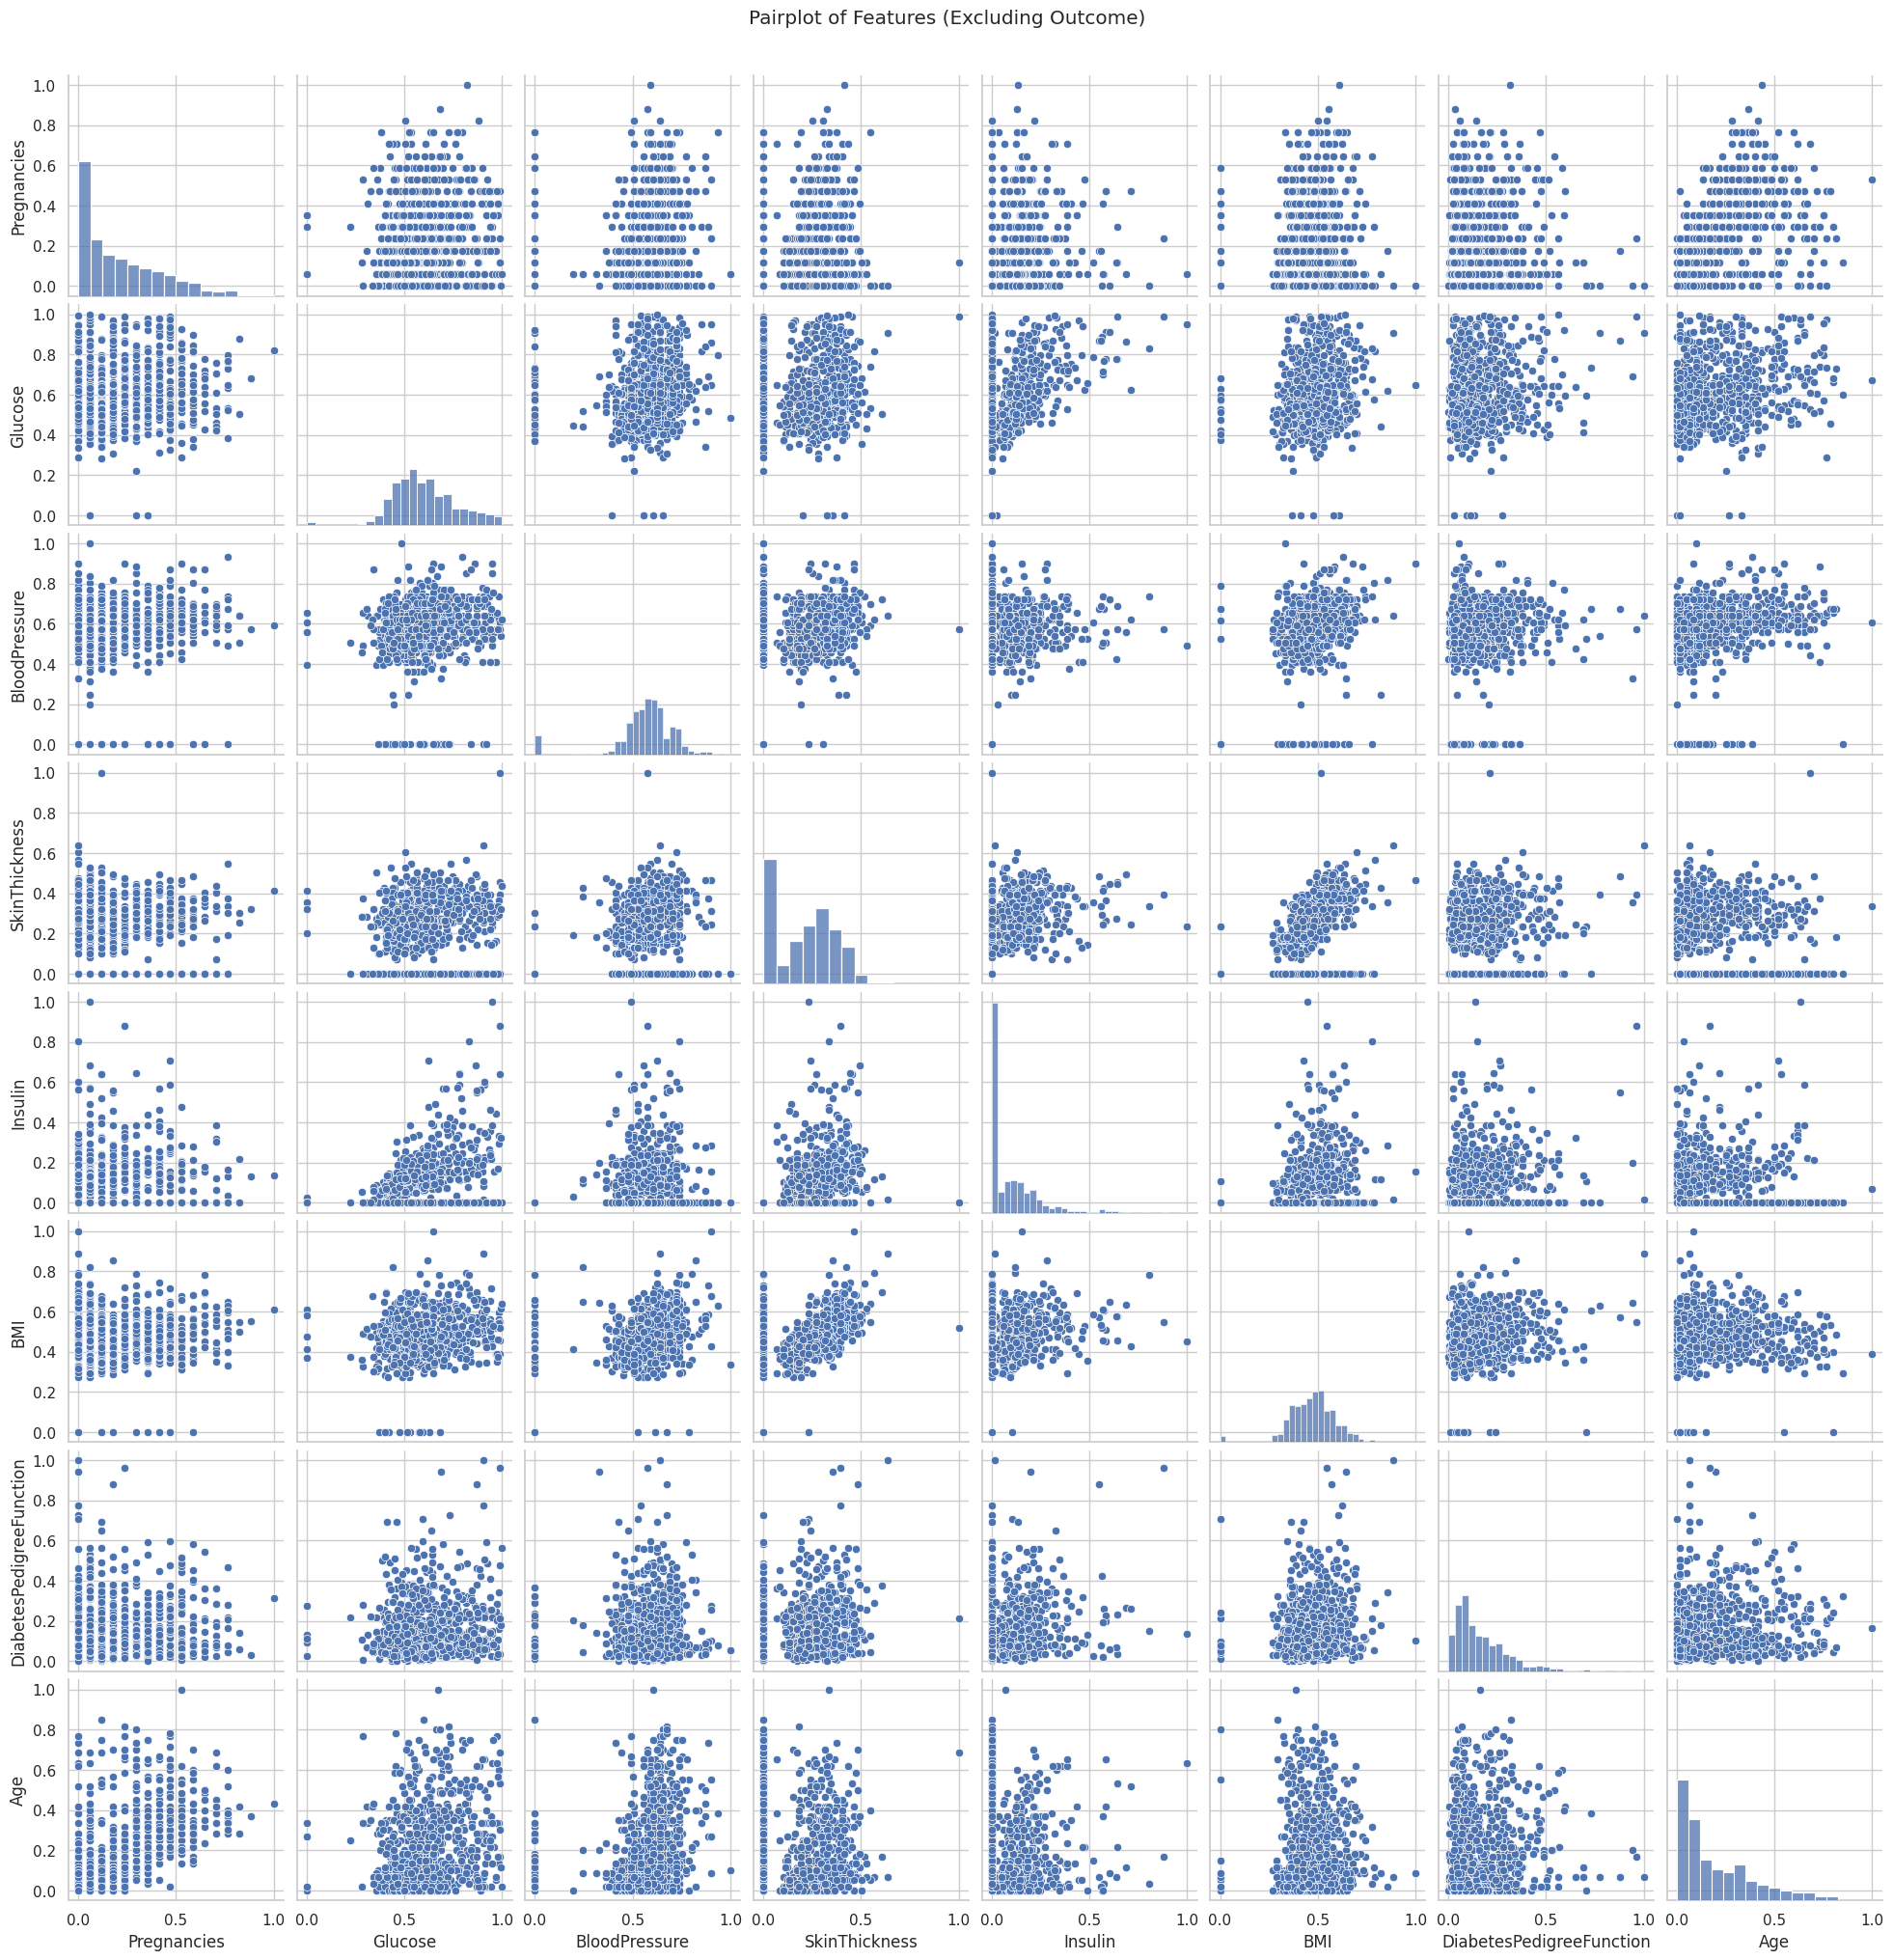

In [31]:

# Multivariate Analysis
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

numeric_cols = df.select_dtypes(include=[np.number]).columns
target_col = 'Outcome'
features = [col for col in numeric_cols if col != target_col]

# 1. Scatter Matrix
plt.figure(figsize=(12,12))
scatter_matrix(df[features], alpha=0.7, diagonal='hist', figsize=(12,12))
plt.suptitle("Scatter Matrix of Features (Excluding Outcome)", y=0.95)
plt.show()

# 2. Pairplot
sns.pairplot(df[features])
plt.suptitle("Pairplot of Features (Excluding Outcome)", y=1.02)
plt.show()


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128550       0.140850      -0.081413   
Glucose                      0.128550  1.000000       0.152590       0.057328   
BloodPressure                0.140850  0.152590       1.000000       0.207371   
SkinThickness               -0.081413  0.057328       0.207371       1.000000   
Insulin                     -0.073471  0.331357       0.088933       0.436783   
BMI                          0.017212  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033294  0.137373       0.041267       0.183897   
Age                          0.543671  0.263514       0.239528      -0.113970   
Outcome                      0.218860  0.468776       0.074893       0.078339   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073471  0.017212                 -0.033294   
Glucose                   0.331357  0.221

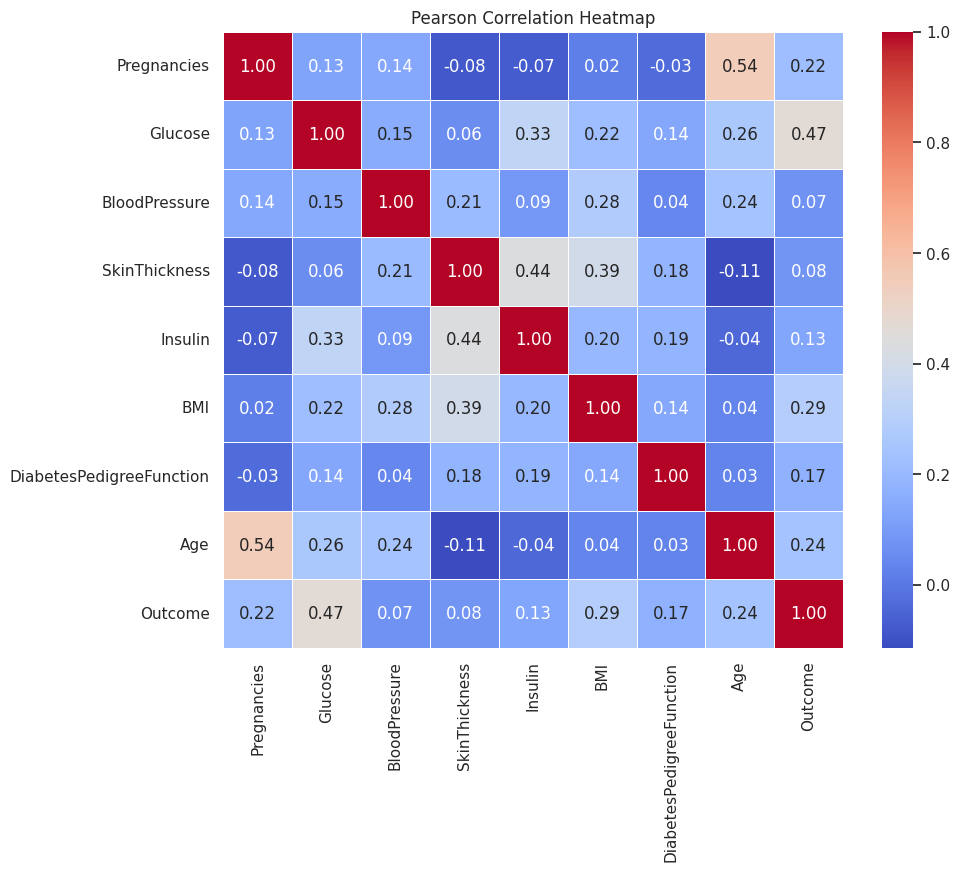

In [36]:
corr_matrix = df.corr(method='pearson')
print(corr_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Pearson Correlation Heatmap")
plt.show()